## Desafio - Cientista de dados


### Analisar os dados e criar um modelo para classificação de gênero.
 
O arquivo test_data_CANDIDATE.csv contem dados de pacientes e carece de fonte.

#### Descrição dos dados.

- age: in years
- sex: (M = male; F = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholesterol in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- nar: number of arms
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- hc: patient's hair colour
- sk: patient's skin colour
- trf: time spent in traffic daily (in seconds)
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

Todos os passos serão explicados nas celulas markdown ou com comentários no próprio codigo.

In [129]:
import pandas as pd
import numpy as np
# lendo um arquivo (string bruta)
df = pd.read_csv(r"test_data_CANDIDATE.csv")
df.dtypes
# verificando os tipos de dados para análise das classes, limpeza dos dados e treinamento do classificador

index         int64
age           int64
sex          object
cp            int64
trestbps      int64
chol        float64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope       float64
ca            int64
thal          int64
nar           int64
hc            int64
sk            int64
trf         float64
dtype: object

#### Entendendo os dados e conferindo com a descrição fornecida

Verifica se que nosso dataframe possui: 
    - Valores NaN na coluna "slope";
    - Valores categoricos e não numéricos na coluna "sex";
    - Valores na coluna "thal" não condiz com o valor descrito fornecido ( 3 = normal; 6 = fixed defect; 7 = reversable defect ), pois possui o valor 2;
    - Coluna "index" não condiz com a descrição fornecida da tabela;
    - A coluna "cp" possui valores invariantes
    - A descrição fornecida dos dados está inconsistente, visto que para as colunas "hc" e "sk" nao informa se são categóricos.

In [130]:
df.head(3)


,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,nar,hc,sk,trf
0,0,49,M,10000,130,269.0,0,1,163,0,0.0,2.0,0,2,2,0,1,6797.761892
1,1,61,F,10000,138,166.0,0,0,125,1,3.6,NaN,1,2,2,1,3,4307.686943
2,2,46,F,10000,140,311.0,0,1,120,1,1.8,NaN,2,3,2,0,1,4118.077502


### Removendo linhas com valores ausentes, colunas invariantes e colunas sem relação com a variável de interesse (Gênero).

In [131]:
# removendo a coluna index
col = df.columns
if any("index" in s for s in col):    
    df = df.drop("index", axis=1)
    print("removeu coluna index")
df.columns

removeu coluna index


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'nar', 'hc', 'sk', 'trf'],
      dtype='object')

In [132]:
# identificando valores NaN e removendo
if (df.isnull().any().any()) :
    df = df.dropna()
    print("removeu linhas com valores ausentes")
df.head(3)

removeu linhas com valores ausentes


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,nar,hc,sk,trf
0,49,M,10000,130,269.0,0,1,163,0,0.0,2.0,0,2,2,0,1,6797.761892
3,69,F,10000,140,254.0,0,0,146,0,2.0,1.0,3,3,2,1,0,7170.849469
4,51,F,10000,100,222.0,0,1,143,1,1.2,1.0,0,2,2,1,0,5579.040145


In [133]:
# Remove linhas duplicadas
if(df.duplicated().any().any()):
    df = df.drop_duplicates()
    print("removeu linhas duplicadas")
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,nar,hc,sk,trf
0,49,M,10000,130,269.0,0,1,163,0,0.0,2.0,0,2,2,0,1,6797.761892
3,69,F,10000,140,254.0,0,0,146,0,2.0,1.0,3,3,2,1,0,7170.849469
4,51,F,10000,100,222.0,0,1,143,1,1.2,1.0,0,2,2,1,0,5579.040145


In [134]:
# usando propriedades do desvio padrao para encontrar 
# e remover colunas com o mesmo valor (colunas invariantes)

df = df.drop(df.std()[(df.std() == 0)].index, axis=1)

In [135]:
# verifica outras colunas possiveis categoricas
columns = ['fbs', 'restecg', 'exang', 'slope', 'nar', 'hc', 'sk']
for col in columns:
    print(col , df[col].unique())
# assume que as colunas abaixo são categóricas 


fbs [0 1]
restecg [1 0 2]
exang [0 1]
slope [2. 1. 0.]
nar [2 0]
hc [0 1 2]
sk [1 0 2 3]


In [136]:
# decompondo variaveis categoricas 
cat_df = pd.get_dummies(df, columns=['fbs', 'restecg', 'exang', 'slope', 'nar', 'hc', 'sk'])
cat_df

,age,sex,trestbps,chol,thalach,oldpeak,ca,thal,trf,fbs_0,...,slope_2.0,nar_0,nar_2,hc_0,hc_1,hc_2,sk_0,sk_1,sk_2,sk_3
0,49,M,130,269.0,163,0.0,0,2,6797.761892,1,...,1,0,1,1,0,0,0,1,0,0
3,69,F,140,254.0,146,2.0,3,3,7170.849469,1,...,0,0,1,0,1,0,1,0,0,0
4,51,F,100,222.0,143,1.2,0,2,5579.040145,1,...,0,0,1,0,1,0,1,0,0,0
5,51,F,140,299.0,173,1.6,0,3,3267.628751,1,...,1,0,1,1,0,0,1,0,0,0
6,58,F,120,284.0,160,1.8,0,2,6556.847684,1,...,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,41,F,120,157.0,182,0.0,0,2,3451.602568,1,...,1,0,1,1,0,0,1,0,0,0
282,66,f,160,246.0,120,0.0,3,1,2861.141185,1,...,0,0,1,0,1,0,0,1,0,0
283,54,F,125,273.0,152,0.5,1,2,6293.123474,1,...,0,0,1,0,0,1,1,0,0,0
284,42,F,120,240.0,194,0.8,0,3,3303.841931,0,...,0,0,1,1,0,0,0,1,0,0


In [137]:
# padronizando variaveis continuas
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

cont_col = ['trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal', 'trf'] 
scaler = ColumnTransformer ([('scaler', StandardScaler(), cont_col)], remainder='passthrough')

In [138]:
# retorna a coluna do dataframe que possui a variável de interesse
features = cat_df.iloc[:, cat_df.columns != 'sex']

# Quando se trata de variaveis categoricas (str) sempre identifique se há padrão , pois ha diference em upper e lowercase
print(df['sex'].unique())
labels = df['sex'].str.upper()
print(labels.unique())



['M' 'F' 'f']
['M' 'F']


In [139]:
# Identificando por pares qual o grau correlação das variáveis

import matplotlib.pyplot as plt

cat_df.corr().style.format("{:0.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

# Dados fracamente correlacionados

,age,trestbps,chol,thalach,oldpeak,ca,thal,trf,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0.0,slope_1.0,slope_2.0,nar_0,nar_2,hc_0,hc_1,hc_2,sk_0,sk_1,sk_2,sk_3
age,1.0,0.2,0.28,-0.5,0.21,0.4,0.041,0.032,-0.15,0.15,0.2,-0.2,0.021,-0.18,0.18,-0.082,0.28,-0.24,0.068,-0.068,-0.011,0.002,0.018,-0.13,-0.077,0.16,0.14
trestbps,0.2,1.0,0.025,-0.2,0.098,0.12,-0.039,0.051,-0.12,0.12,0.048,-0.074,0.11,-0.0053,0.0053,-0.038,0.074,-0.056,-0.0066,0.0066,0.021,-0.063,0.077,-0.084,0.044,0.0048,0.068
chol,0.28,0.025,1.0,-0.015,0.07,0.061,0.12,-0.049,0.07,-0.07,0.13,-0.18,0.18,-0.015,0.015,-0.015,0.063,-0.056,0.028,-0.028,-0.14,0.22,-0.15,0.008,-0.039,0.11,-0.097
thalach,-0.5,-0.2,-0.015,1.0,-0.3,-0.32,-0.026,-0.049,0.076,-0.076,-0.11,0.15,-0.14,0.46,-0.46,0.11,-0.52,0.47,-0.22,0.22,-0.1,0.078,0.046,-0.13,0.094,0.052,0.0086
oldpeak,0.21,0.098,0.07,-0.3,1.0,0.36,0.17,0.17,0.028,-0.028,0.072,-0.14,0.29,-0.18,0.18,0.33,0.3,-0.46,0.011,-0.011,0.078,-0.15,0.14,0.012,-0.07,0.028,0.049
ca,0.4,0.12,0.061,-0.32,0.36,1.0,0.066,0.086,-0.15,0.15,0.078,-0.1,0.088,-0.12,0.12,0.091,0.068,-0.11,0.021,-0.021,0.029,-0.037,0.015,-0.018,-0.089,0.13,0.0072
thal,0.041,-0.039,0.12,-0.026,0.17,0.066,1.0,0.11,0.077,-0.077,-0.052,0.09,-0.16,-0.12,0.12,0.0016,0.17,-0.18,0.11,-0.11,0.013,-0.028,0.026,0.071,-0.21,0.055,0.12
trf,0.032,0.051,-0.049,-0.049,0.17,0.086,0.11,1.0,0.18,-0.18,0.026,0.00088,-0.11,-0.097,0.097,0.082,0.11,-0.15,-0.15,0.15,0.17,-0.25,0.15,-0.015,0.029,0.0014,-0.021
fbs_0,-0.15,-0.12,0.07,0.076,0.028,-0.15,0.077,0.18,1.0,-1.0,-0.057,0.046,0.045,-0.11,0.11,-0.1,0.041,0.0076,0.032,-0.032,-0.12,0.11,0.017,0.019,0.073,-0.085,-0.035
fbs_1,0.15,0.12,-0.07,-0.076,-0.028,0.15,-0.077,-0.18,-1.0,1.0,0.057,-0.046,-0.045,0.11,-0.11,0.1,-0.041,-0.0076,-0.032,0.032,0.12,-0.11,-0.017,-0.019,-0.073,0.085,0.035


In [144]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, brier_score_loss, accuracy_score, precision_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
import pickle

global acc_dic
acc_dic = {}


# Dividir nossos dados
train, test, train_labels, test_labels = train_test_split(features,
                                                          labels,
                                                          test_size=0.3,
                                                          random_state=42)

scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)


### Entendendo algumas métricas de saída
Acurácia acc_score ou  Precisão  = Proporção de observações classificadas corretamente

Recall = Proporção de verdadeiros positivos corretamente identificados

F-score (F1) = Média harmônica entre a acurácia e o recall de um classificador


In [152]:
# criando função de predição e plotando graficos
# alguns modelos nao fornece o metodo predict_proba (calcula a probabilidade de ocorrencia da classe de interesse)
# Dois gráficos serão gerados: Matriz de confusão e curva roc
def model_plot(model, train, train_labels, test, test_labels ,title=""):
    
    name = title
    clf = model
    clf.fit(train, train_labels)
    predict = clf.predict(test)
    
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(test)
    else:
        prob_pos = clf.decision_function(test)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())

    prob_pos = prob_pos[:,1]
    clf_score = brier_score_loss(test_labels, prob_pos, pos_label= 1)
    acc = accuracy_score(test_labels, predict)

    print("\tPrecision: %1.3f" % (acc))
    print("\tBrier: %1.3f" % (clf_score))
    
    print(classification_report(test_labels, predict))
    
    plot_confusion_matrix(clf, 
                      test, 
                      test_labels,
                      cmap=plt.cm.Blues)
    
    plot_roc_curve(clf, test, test_labels)  # doctest: +SKIP
    plt.show()

    acc_dic[name] = acc
    if len(acc_dic) > 0 and acc >= acc_dic[max(acc_dic, key=acc_dic.get)]:
        save_model(model)
        print("\nsalvando clasificador :", name)



In [153]:
def save_model(model):
    pkl_filename = "pickle_model.pkl"
    with open(pkl_filename, 'wb') as file:
        pickle.dump(model, file)

## Treinando os modelos e apresentando os resultados

#### 1. Regressão Linear Logistica

Precision: 0.683
	Brier: 0.145
              precision    recall  f1-score   support

           F       0.70      0.88      0.78        26
           M       0.62      0.33      0.43        15

    accuracy                           0.68        41
   macro avg       0.66      0.61      0.61        41
weighted avg       0.67      0.68      0.65        41



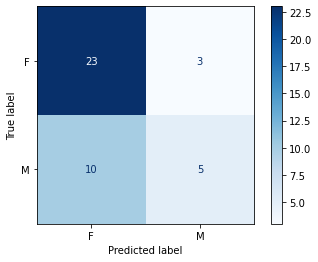

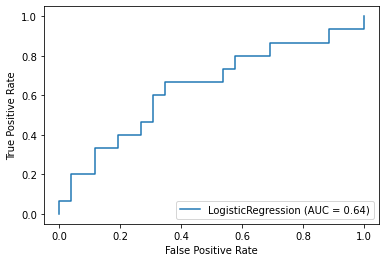


salvando clasificador : Regressão Logística


In [154]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg')
model_plot(lr, train, train_labels, test, test_labels, title="Regressão Logística")

### A precisão do algoritmo ficou em 0.68, o Recall foi de 0.61 e o F1-score 0.61. O valor da AUC do modelo foi de 0,605.


Precision: 0.610
	Brier: 0.182
              precision    recall  f1-score   support

           F       0.66      0.81      0.72        26
           M       0.44      0.27      0.33        15

    accuracy                           0.61        41
   macro avg       0.55      0.54      0.53        41
weighted avg       0.58      0.61      0.58        41



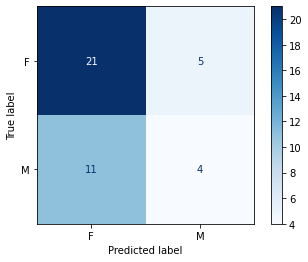

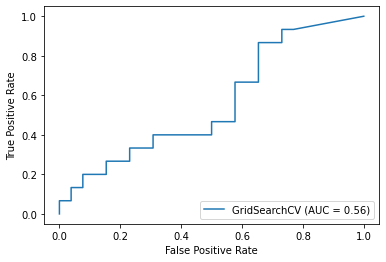

In [155]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
grid_params = {
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
    }
gs = GridSearchCV(knn, param_grid=grid_params, scoring='roc_auc',cv=3, n_jobs=-1)

model_plot(gs, train, train_labels, test, test_labels, title="KNeighbors")

Precision: 0.659
	Brier: 0.231
              precision    recall  f1-score   support

           F       0.70      0.81      0.75        26
           M       0.55      0.40      0.46        15

    accuracy                           0.66        41
   macro avg       0.62      0.60      0.61        41
weighted avg       0.64      0.66      0.64        41



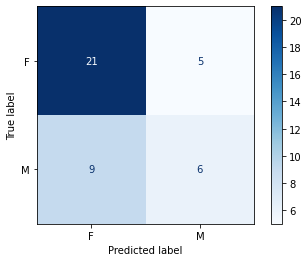

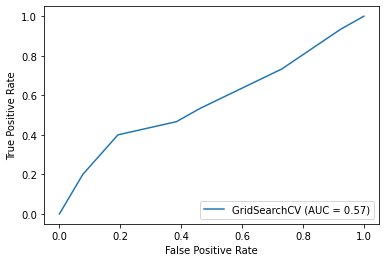

In [156]:
from sklearn import tree
param_grid = {"criterion": ["gini", "entropy"],
                "min_samples_split": [2,5,8,15,20],
                "max_depth": [2,4,6,8,10],
                "min_samples_leaf": [1,2,4,8,10],
                "max_leaf_nodes": [2,4, 7,9, 12, 20],}
dt = tree.DecisionTreeClassifier(random_state=42)

grid_dt = GridSearchCV(dt, cv = 3,
                        param_grid=param_grid,
                        n_jobs = -1)
model_plot(grid_dt, train, train_labels, test, test_labels, title="Decision Tree")


In [124]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 5)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 20, num = 5)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [2, 4]
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}

fit_rf = RandomForestClassifier()

grid_rf = GridSearchCV(fit_rf, cv=3, param_grid=param_grid, n_jobs = -1)
model_plot(grid_rf, train, train_labels, test, test_labels, title="Random Forest")

KeyboardInterrupt: 

Precisão:  0.6341463414634146


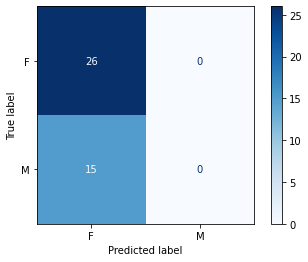

In [158]:
from sklearn.svm import SVC

svc = SVC(kernel="linear", C=0.025)

#Treina o modelo usando os dados de treino e confere o score
svc.fit(train, train_labels)
svc.score(train, train_labels)
# print(svc.score(train, train_labels))

#Prevê o resultado
svc_predict = svc.predict(test)
svc_acc = accuracy_score(test_labels, svc_predict)
print("Precisão: ", svc_acc)

# gera a matriz de confusão
plot_confusion_matrix(svc, 
                      test, 
                      test_labels,
                      cmap=plt.cm.Blues)
            
acc_dic[name] = acc
if len(acc_dic) > 0 and acc >= acc_dic[max(acc_dic, key=acc_dic.get)]:
    save_model(model)
    print("\nsalvando clasificador :", name)

Precision: 0.659
	Brier: 0.242
              precision    recall  f1-score   support

           F       0.73      0.73      0.73        26
           M       0.53      0.53      0.53        15

    accuracy                           0.66        41
   macro avg       0.63      0.63      0.63        41
weighted avg       0.66      0.66      0.66        41



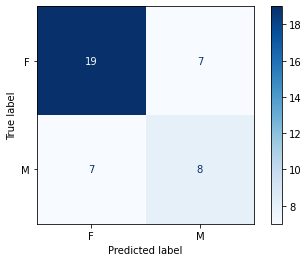

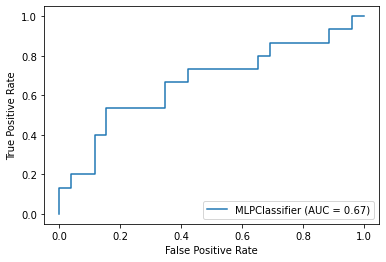

In [162]:
from sklearn.neural_network import MLPClassifier

# mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=10000, alpha=0.0001,
#                      solver='sgd', verbose=10,  random_state=21,tol=0.000000001).fit(train, train_labels)

mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), activation = 'identity', max_iter=1000, alpha=0.0001,
                     solver='sgd', random_state=21, tol=0.000000001).fit(train, train_labels)

model_plot(mlp, train, train_labels, test, test_labels, title="MLP")


Precision: 0.537
	Brier: 0.310
              precision    recall  f1-score   support

           F       0.64      0.62      0.63        26
           M       0.38      0.40      0.39        15

    accuracy                           0.54        41
   macro avg       0.51      0.51      0.51        41
weighted avg       0.54      0.54      0.54        41



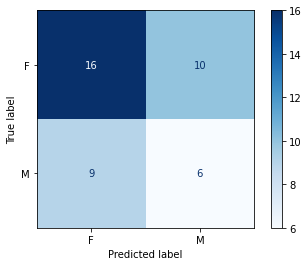

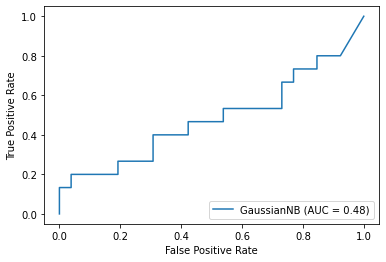

In [164]:
from sklearn.naive_bayes import GaussianNB

# Inicializar nosso classificador
gnb = GaussianNB()

model_plot(gnb, train, train_labels, test, test_labels, title="Naive Bayes")

#### Classificador de melhor acurácia

In [112]:
if len(acc_dic) > 0:
    
    longest = max(acc_dic, key = lambda chave: acc_dic[chave])
    print( "{} é o melhor classificador com acurácia de {:3.02f} %".format(longest, acc_dic[longest] * 100))
else: print( "Métricas nao encontradas")

ValueError: max() arg is an empty sequence

### Predizendo o gênero

In [50]:
df = pd.read_csv(r"test_data_CANDIDATE.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'test_data_CANDIDATE.csv'

In [51]:
col = df.columns
if any("index" in s for s in col):
    # removendo a coluna index
    df = df.drop("index", axis=1)
    print("removeu coluna index")   

    
# identificando valores NaN
if (df.isnull().any().any()) :
    df = df.dropna()
    print("removeu linhas com valores ausentes")

# removendo linhas duplicadas
if(df.duplicated().any().any()):
    df = df.drop_duplicates()
    print("removeu linhas duplicadas")
    
col = df.columns    
if any("sex" in s for s in col):
    # removendo a coluna sex
    labels = df['sex'].str.upper()
    df = df.drop("sex", axis=1)
    print("removeu coluna sex")

# usando propriedades do desvio padrao para encontrar e remover colunas com o mesmo valor
df = df.drop(df.std()[(df.std() == 0)].index, axis=1)

# transformando int em float para todo dataframe
numeric_columns = df.select_dtypes(['int64']).columns
df[numeric_columns] = df[numeric_columns].astype('float32')
df.describe()


NameError: name 'df' is not defined

In [52]:
df.head(5)

NameError: name 'df' is not defined

In [53]:
import pickle

# TODO: arrumar os caminhos
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'rb') as file:
    model = pickle.load(file)
    
features = df.values.tolist()
features = StandardScaler().fit_transform(features)
# print(features)

out_predict = model.predict(features)
print(len(out_predict), len(labels))

svc_acc = accuracy_score(labels, out_predict)
print(svc_acc)
print(out_predict)

pd.DataFrame(out_predict, columns=['sex']).to_csv('newsample_PREDICTIONS_Luiz_Gustavo_Ribeiro.csv', index=False)

NameError: name 'df' is not defined